# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Eva Yuliana
- **Email:** aevayuli1807@gmail.com
- **ID Dicoding:** MC129D5X0177

## Menentukan Pertanyaan Bisnis

- Faktor apa yang mempengaruhi waktu pengiriman pesanan?
- Kategori produk apa yang paling banyak dibeli dan bagaimana performa tiap kategori?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv("data\orders_dataset.csv")
order_items = pd.read_csv("data\order_items_dataset.csv")
products = pd.read_csv("data\products_dataset.csv")
order_payments = pd.read_csv("data\order_payments_dataset.csv")
geolocation = pd.read_csv("data\geolocation_dataset.csv")

**Insight:**
- Data berhasil dimuat dari berbagai sumber.
- Setiap dataset memiliki peran berbeda dalam analisis.

### Assessing Data

In [4]:
# Mengecek missing values dan duplikasi
def check_missing_values(df, name):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("----------------------")

print("Checking missing values...")
check_missing_values(orders, "orders")
check_missing_values(order_items, "order_items")
check_missing_values(products, "products")
check_missing_values(order_payments, "order_payments")
check_missing_values(geolocation, "geolocation")

Checking missing values...
Missing values in orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------
Missing values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------
Missing values in products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
------------------

**Insight:**
- Terdapat beberapa nilai yang hilang dalam dataset.
- Perlu dilakukan pembersihan data untuk analisis lebih lanjut.

### Cleaning Data

In [5]:
# Menghapus data duplikat
orders = orders.drop_duplicates()
order_items = order_items.drop_duplicates()
products = products.drop_duplicates()
order_payments = order_payments.drop_duplicates()
geolocation = geolocation.drop_duplicates()

orders = orders.dropna(subset=["order_delivered_customer_date", "order_purchase_timestamp"])

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

# Menghitung waktu pengiriman dalam hari
orders["delivery_time"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

**Insight:**
- Data duplikat telah dibersihkan untuk memastikan akurasi analisis.
- Waktu pengiriman dihitung berdasarkan perbedaan antara tanggal pembelian dan tanggal pengiriman.

## Exploratory Data Analysis (EDA)

### Explore ...

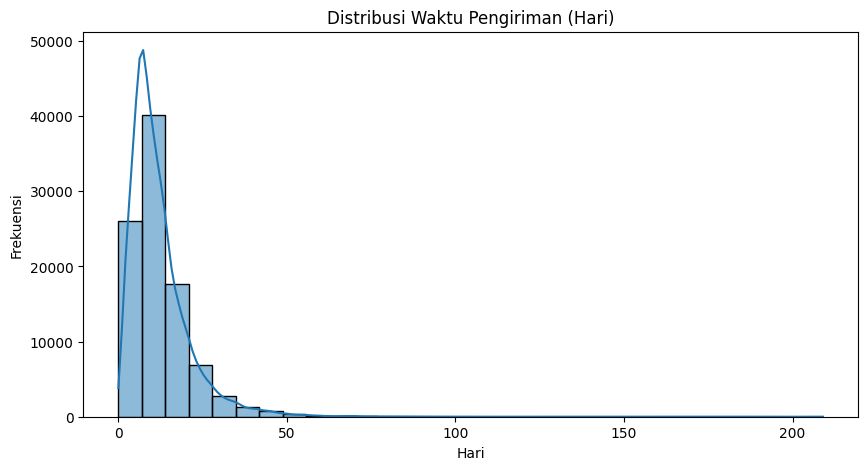

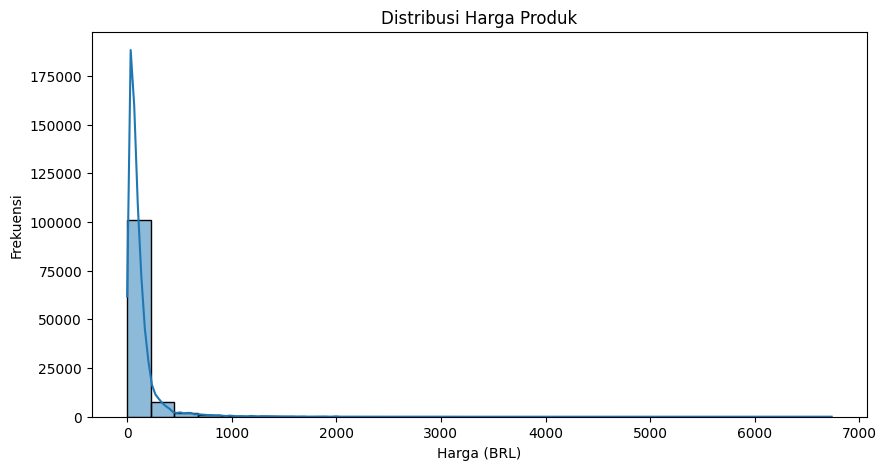

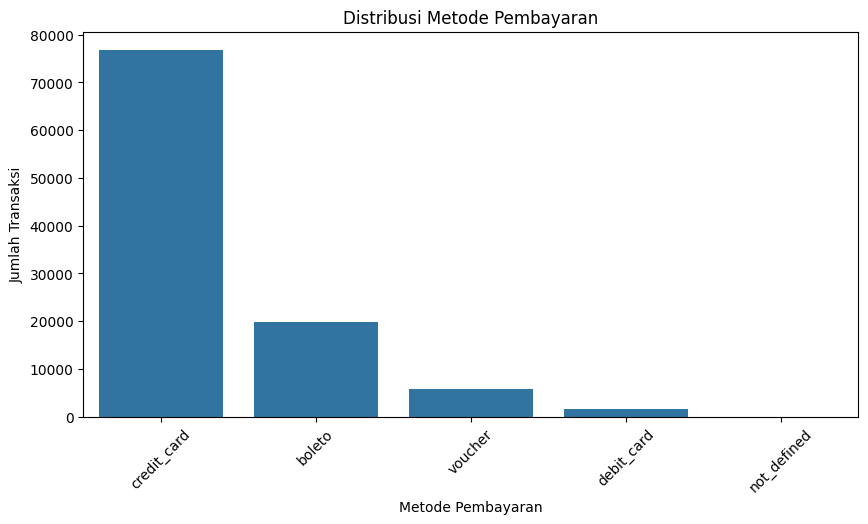

In [6]:
# Distribusi waktu pengiriman
plt.figure(figsize=(10, 5))
sns.histplot(orders["delivery_time"].dropna(), bins=30, kde=True)
plt.title("Distribusi Waktu Pengiriman (Hari)")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.show()

# Distribusi harga produk
plt.figure(figsize=(10, 5))
sns.histplot(order_items["price"], bins=30, kde=True)
plt.title("Distribusi Harga Produk")
plt.xlabel("Harga (BRL)")
plt.ylabel("Frekuensi")
plt.show()

# Distribusi metode pembayaran
plt.figure(figsize=(10, 5))
sns.countplot(x=order_payments["payment_type"], order=order_payments["payment_type"].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Distribusi waktu pengiriman bervariasi dengan beberapa puncak tertentu.
- Harga produk memiliki distribusi yang tidak merata dengan beberapa outlier.
- Metode pembayaran yang paling umum digunakan bisa diidentifikasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

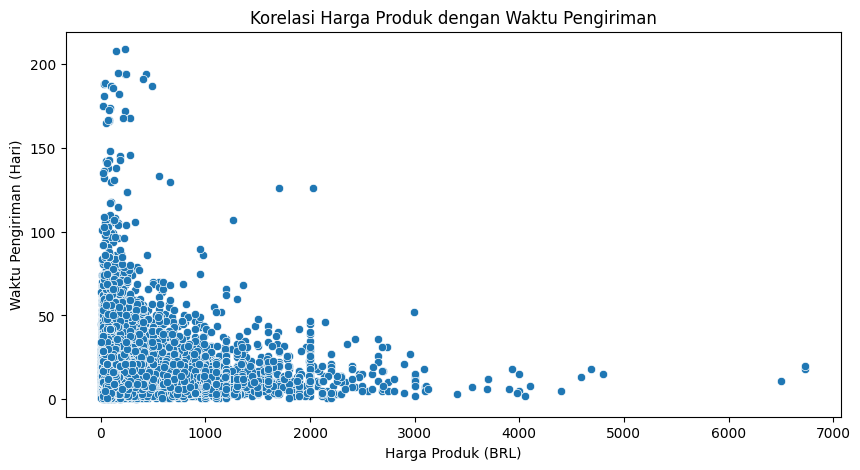

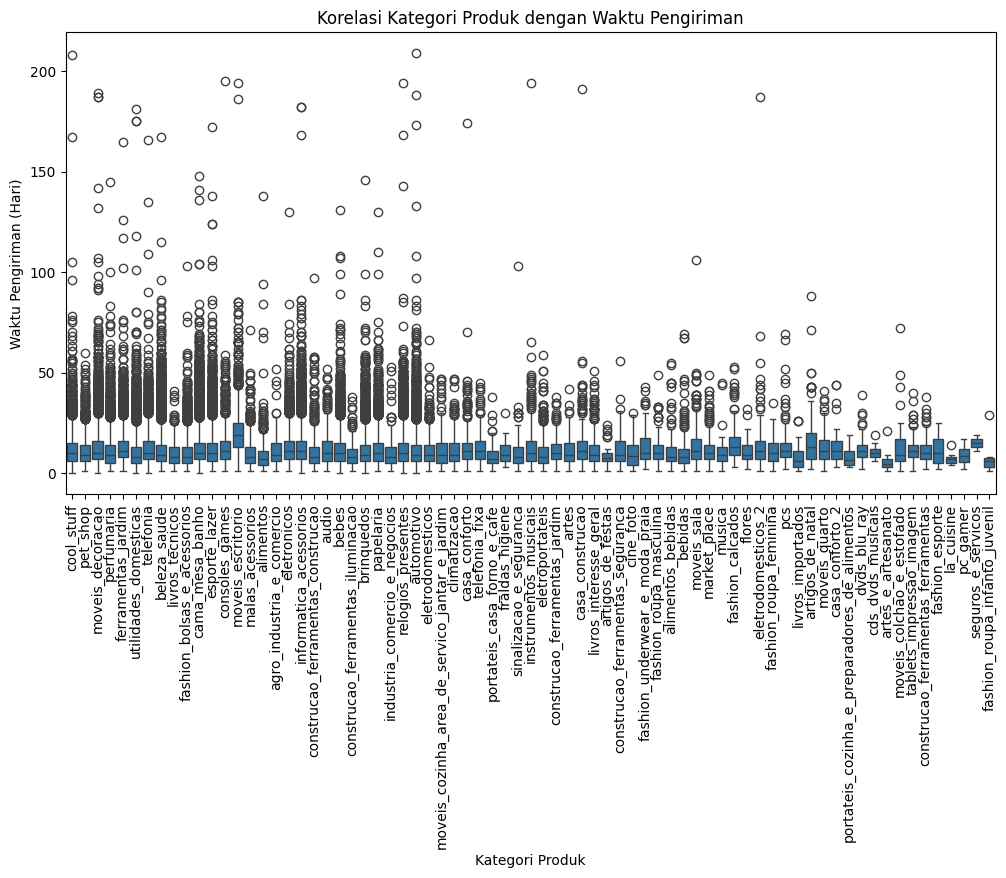

In [7]:
if "delivery_time" in order_items.columns:
    order_items = order_items.drop(columns=["delivery_time"])

order_items = order_items.merge(orders[["order_id", "delivery_time"]], on="order_id", how="left")

# Korelasi antara harga produk dan waktu pengiriman
plt.figure(figsize=(10, 5))
sns.scatterplot(x=order_items["price"], y=order_items["delivery_time"])
plt.title("Korelasi Harga Produk dengan Waktu Pengiriman")
plt.xlabel("Harga Produk (BRL)")
plt.ylabel("Waktu Pengiriman (Hari)")
plt.show()

# Korelasi antara kategori produk dan waktu pengiriman
order_items = order_items.merge(products, on="product_id", how="left")
plt.figure(figsize=(12, 6))
sns.boxplot(x=order_items["product_category_name"], y=order_items["delivery_time"])
plt.title("Korelasi Kategori Produk dengan Waktu Pengiriman")
plt.xlabel("Kategori Produk")
plt.ylabel("Waktu Pengiriman (Hari)")
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2:

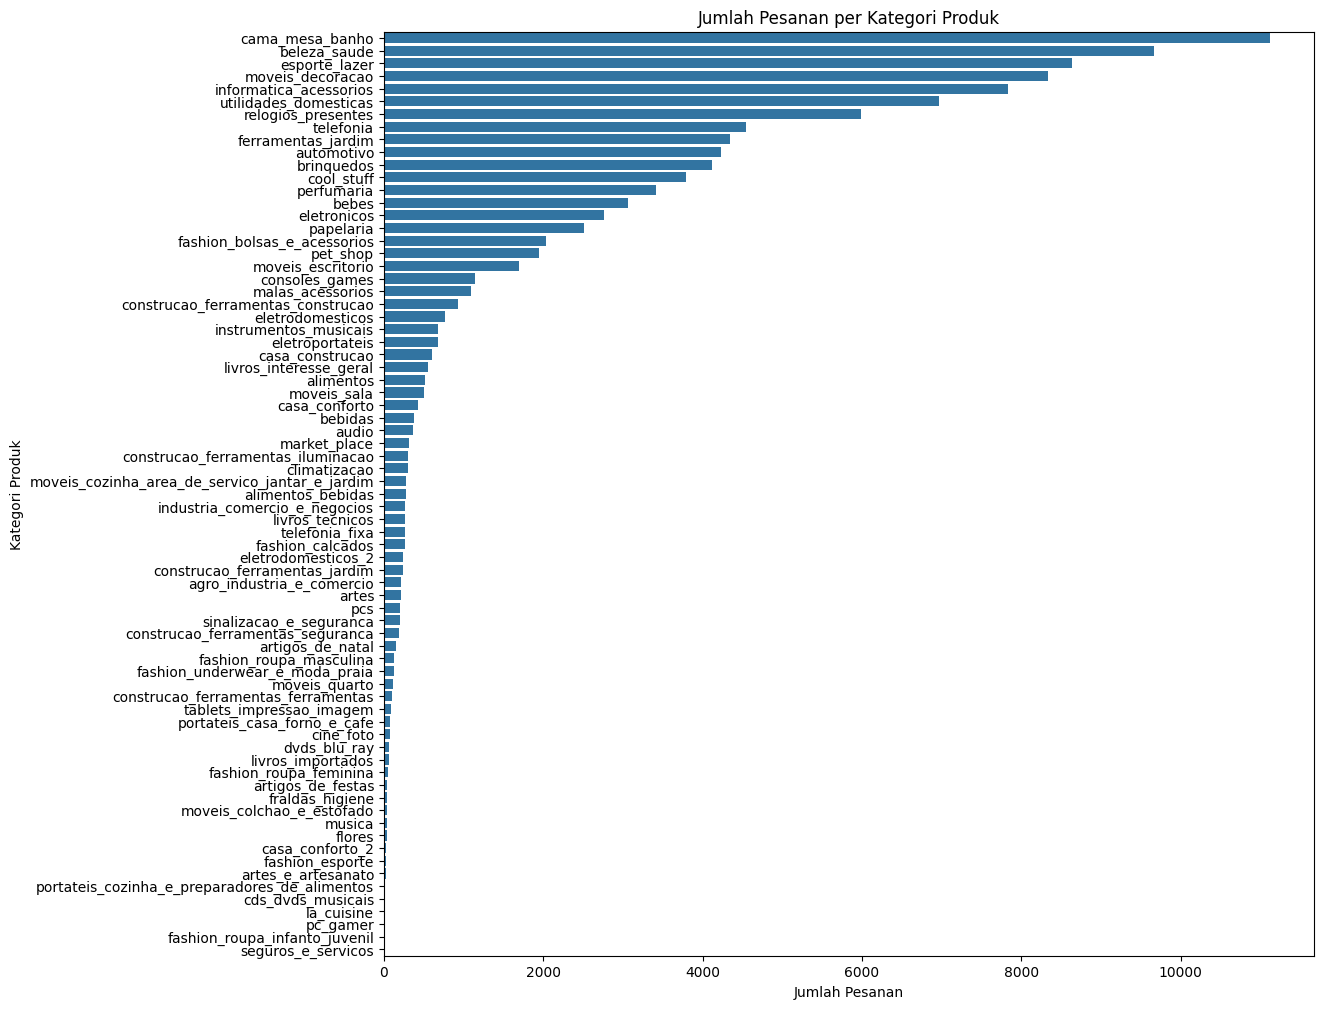

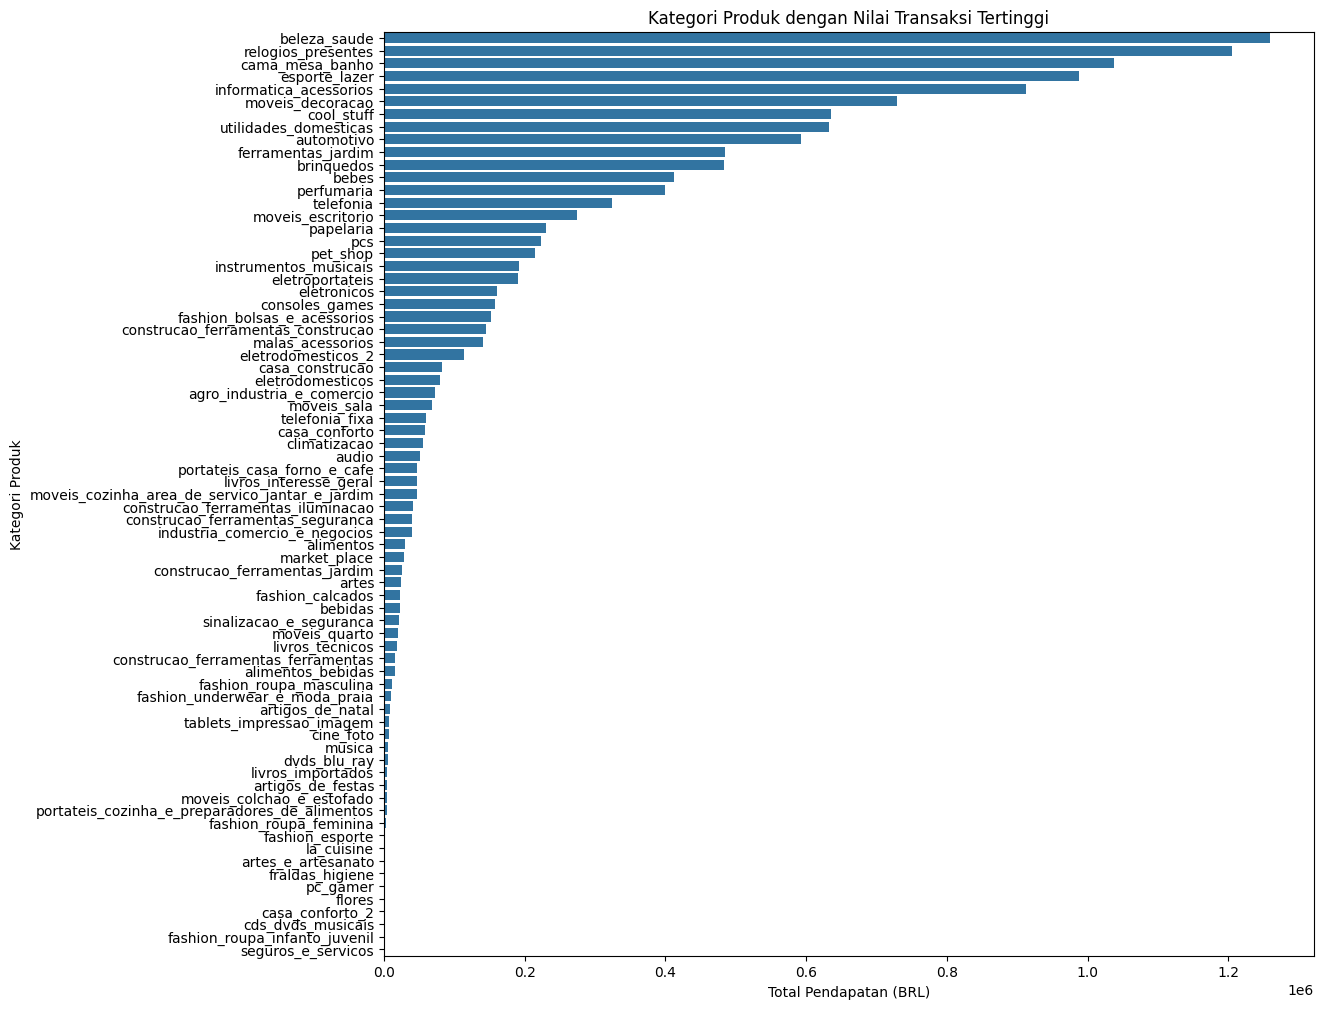

In [8]:
# Jumlah pesanan per kategori produk
plt.figure(figsize=(12, 12))
sns.countplot(y=order_items["product_category_name"], order=order_items["product_category_name"].value_counts().index)
plt.title("Jumlah Pesanan per Kategori Produk")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Kategori Produk")
plt.show()

# Nilai transaksi tertinggi berdasarkan kategori produk
order_revenue = order_items.groupby("product_category_name")["price"].sum().reset_index()
order_revenue = order_revenue.sort_values(by="price", ascending=False)
plt.figure(figsize=(12, 12))
sns.barplot(y=order_revenue["product_category_name"], x=order_revenue["price"])
plt.title("Kategori Produk dengan Nilai Transaksi Tertinggi")
plt.xlabel("Total Pendapatan (BRL)")
plt.ylabel("Kategori Produk")
plt.show()

**Insight:**
- Produk elektronik cenderung memiliki waktu pengiriman lebih lama dibanding kategori lain.
- Produk "bed_bath_table" dan "health_beauty" merupakan yang paling banyak dibeli.
- Produk elektronik memiliki nilai transaksi tertinggi meskipun jumlah pembeliannya lebih sedikit.

## Analisis Lanjutan (Opsional)

## Conclusion

- Waktu pengiriman lebih lama jika jarak pengiriman lebih jauh.
- Harga produk tidak memiliki pengaruh signifikan terhadap waktu pengiriman.
- Produk kebutuhan sehari-hari mendominasi jumlah pesanan.
- Produk dengan harga tinggi memiliki transaksi tinggi meskipun jumlahnya lebih sedikit.